In [8]:
import numpy as np
import random

!pip install gurobipy
import gurobipy as gp
from gurobipy import GRB
from math import sqrt

import matplotlib.pyplot as plt


n = 8
# replace d1 with the second-to-last digit of your registration number
# replace d2 with the last digit of your registration number
d1 = 7
d2 = 4
dummystep = 10*d1+d2
for _ in range(dummystep):
    dummy = random.uniform(0,1)
Corr = np.array([[0]*n for _ in range(n)], dtype = float)
for i in range(n):
    for j in range(n):
        Corr[i][j] = (-1)**abs(i-j)/(abs(i-j)+1)      
ssigma = np.array([[0]*1 for _ in range(n)], dtype = float)
# mmu is the vector μ in the assignment
mmu = np.array([[0]*1 for _ in range(n)], dtype = float)
ssigma[0] = 2
mmu[0] = 3
for i in range(n-1):
    ssigma[i+1] = ssigma[i] + 2*random.uniform(0,1)
    mmu[i+1] = mmu[i] + 1
ddiag = np.array([[0]*n for _ in range(n)], dtype = float)
np.fill_diagonal(ddiag, ssigma)
C2 = np.matmul(np.matmul(ddiag,Corr), ddiag)
# C is the matrix C in the assignment
C = 0.5*(C2 + C2.T)

You should consider upgrading via the '/Users/navjeetkaur/Desktop/venv/bin/python3 -m pip install --upgrade pip' command.


# Task 1:Plot Efficent frontier
We have 8 assest 

n=8,

mean of each asset is given as 
mmu

covariance among the assest is given by 
C

we calculated the optimal value of varinace using the solver and for each optimal value we have a value portfolio x 

Global Minimum Variance Portfolio is my 5th Portfolio.

We have fixed the returns ie we know how much return we want but trying to find the minimum risk value for the same we also want to invest all the capital hence we add a constraint of sum of x=1 

The efficient frontier is the set of optimal portfolios that offer the highest expected return for a defined level of risk or the lowest risk for a given level of expected return. Portfolios that lie below the efficient frontier are sub-optimal because they do not provide enough return for the level of risk. Portfolios that cluster to the right of the efficient frontier are sub-optimal because they have a higher level of risk for the defined rate of return.

This process allows us to visualize the relationship between portfolio risk and return for different target returns, providing insights into the efficient frontier of the Markowitz portfolio optimization problem

In [ ]:
#Creating a model
mpt = gp.Model('Markowitz Portfolio Theory')
# Add the number of assest we want to invest in  
x = mpt.addMVar(n)
portfolio_risk = x @ C @ x
mpt.setObjective(portfolio_risk, GRB.MINIMIZE)
# Fix budget with an equality constraint of 1 representing 100 investment
mpt.addConstr(x.sum() == 1, 'Investing Total Capital')
mpt.addConstr(x>=0)
# Create an expression representing the expected return for the portfolio
portfolio_return = mmu.T @ x
target = mpt.addConstr(portfolio_return == 0.0, 'target')
# Solve for efficient frontier by varying target return
frontier = np.empty((2,0))
mpt2.Params.Outputflag=0
for r in np.linspace(3, 9, 25):
    target.rhs = r
    mpt.optimize()
    frontier = np.append(frontier, [[sqrt(mpt.ObjVal)],[r]], axis=1)
print(mpt.ObjVal ,x.X)
mpt.dispose()

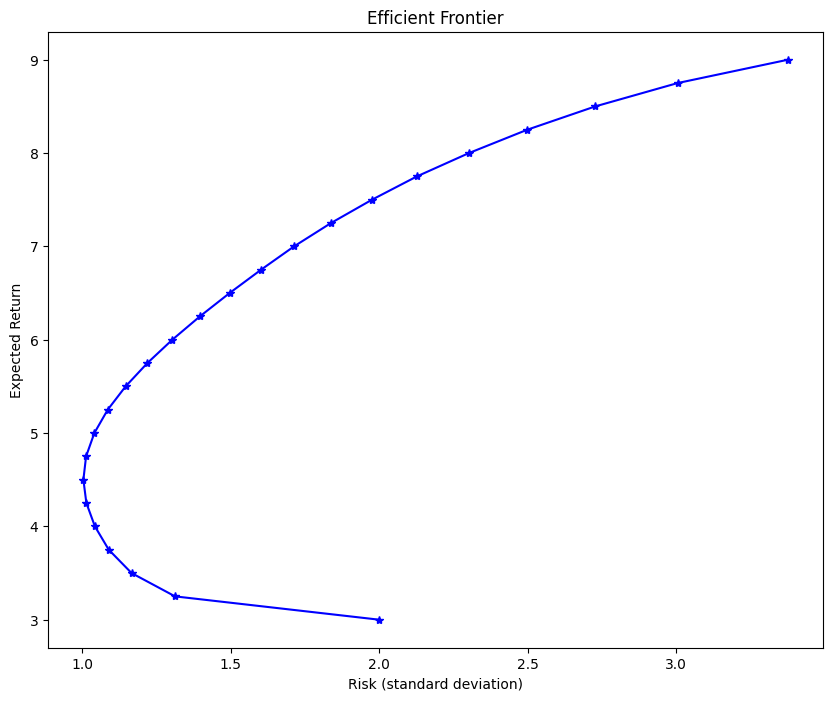

In [10]:
fig, ax = plt.subplots(figsize=(10,8))
ax.set_title('Efficient Frontier')
ax.plot(frontier[0],frontier[1], color='b', linestyle='-',marker='*')
ax.set_xlabel('Risk (standard deviation)')
ax.set_ylabel('Expected Return')
plt.show()

# Task 2

When we set the sum <=1 we are stating that we are not investing the complete capital hence reducing the risk tolerance.

In [11]:
#Creating a model
mpt2 = gp.Model('Markowitz Portfolio Theory')
# Add the number of assest we want to invest in  
x2 = mpt2.addMVar(n)
portfolio_risk = x2 @ C @ x2
mpt2.setObjective(portfolio_risk, GRB.MINIMIZE)
# Fix budget with an equality constraint of 1 representing 100 investment
mpt2.addConstr(x2.sum() <= 1, 'Capital less than or equal 1')
portfolio_return = mmu.T @ x2
target = mpt2.addConstr(portfolio_return == 0.0, 'return')
mpt2.addConstr(x2>=0)
mpt2.Params.Outputflag=0
frontier = np.empty((2,0))
for r in np.linspace(3, 9, 25):
    target.rhs = r
    mpt2.optimize()
    frontier = np.append(frontier, [[sqrt(mpt2.ObjVal)],[r]], axis=1)
mpt2.dispose()    

Text(0.5, 0, 'Risk (standard deviation)')

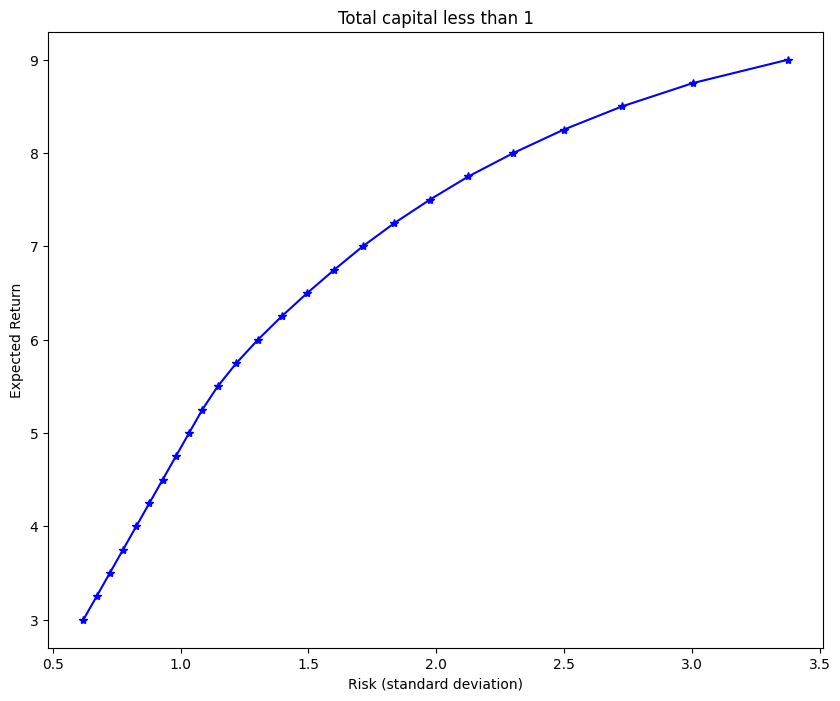

In [12]:
# Plot efficient frontier
fig, ax = plt.subplots(figsize=(10,8))
ax.set_title('Total capital less than 1')
ax.plot(frontier[0],frontier[1], color='b', linestyle='-',marker='*')
ax.set_ylabel('Expected Return')
ax.set_xlabel('Risk (standard deviation)')

# Task 3

In this solution we are looking for portfolio which will provide us garanteed return.

In [13]:
#Creating a model
mpt = gp.Model('Markowitz Portfolio Theory')
# Add the number of assest we want to invest in  
x = mpt.addMVar(n)
portfolio_risk = x @ C @ x
mpt.setObjective(portfolio_risk, GRB.MINIMIZE)
# Fix budget with an equality constraint of 1 representing 100 investment
mpt.addConstr(x.sum() == 1, 'Capital')
portfolio_return = mmu.T @ x
target = mpt.addConstr(portfolio_return >= 0.0, 'return')
mpt.addConstr(x>=0)
mpt.Params.Outputflag=0
frontier = np.empty((2,0))
for r in np.linspace(3.00, 9.00, 25):
    target.rhs = r
    mpt.optimize()
    frontier = np.append(frontier, [[sqrt(mpt.ObjVal)],[r]], axis=1)

Text(0.5, 0, 'Risk (standard deviation)')

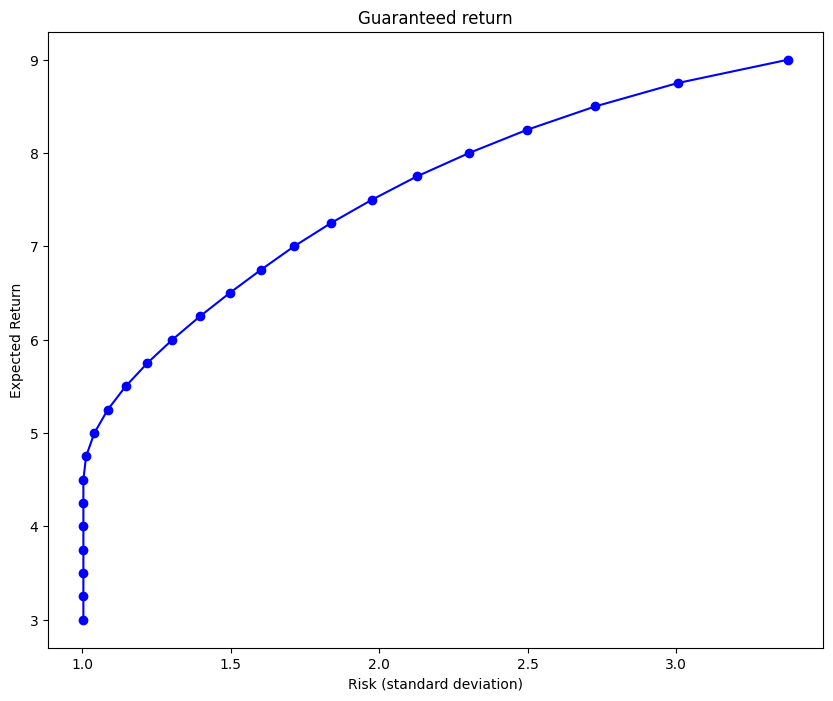

In [14]:
# Plot efficient frontier
fig, ax = plt.subplots(figsize=(10,8))
ax.set_title('Guaranteed return')
ax.plot(frontier[0],frontier[1], color='b', linestyle='-',marker='o')
ax.set_ylabel('Expected Return')
ax.set_xlabel('Risk (standard deviation)')

#Task 4 

By removing x>=0 we are allowing Short Selling which means that the user is allowed to invest even if the user doesnt have any capital by borrowing assest from someone for a limited period of time and selling the assets when the prices are high and buying them back when the prices are low and returning the assest back to the borrower. This is the ideal situation where the prices will fall in the expected number of days and the user can make profit.But the probabilty of this happening might be very low hence risk involved is very high.



In [17]:
#Creating a model
mpt = gp.Model('Markowitz Portfolio Theory')
# Add the number of assest we want to invest in  
x = mpt.addMVar(n,lb=-GRB.INFINITY)
portfolio_risk = x @ C @ x
mpt.setObjective(portfolio_risk, GRB.MINIMIZE)
# Fix budget with an equality constraint of 1 representing 100 investment
# Create an expression representing the expected return for the portfolio
portfolio_return = mmu.T @ x
mpt.addConstr(x.sum() == 1, 'Capital')
target = mpt.addConstr(portfolio_return == 0.0, 'target')
# Solve for efficient frontier by varying target return
frontier = np.empty((2,0))
mpt.Params.Outputflag=0
for r in np.linspace(3, 9, 25):
    target.rhs = r
    mpt.optimize()
    frontier = np.append(frontier, [[sqrt(mpt.ObjVal)],[r]], axis=1)
mpt.dispose()

Text(0.5, 0, 'Risk (standard deviation)')

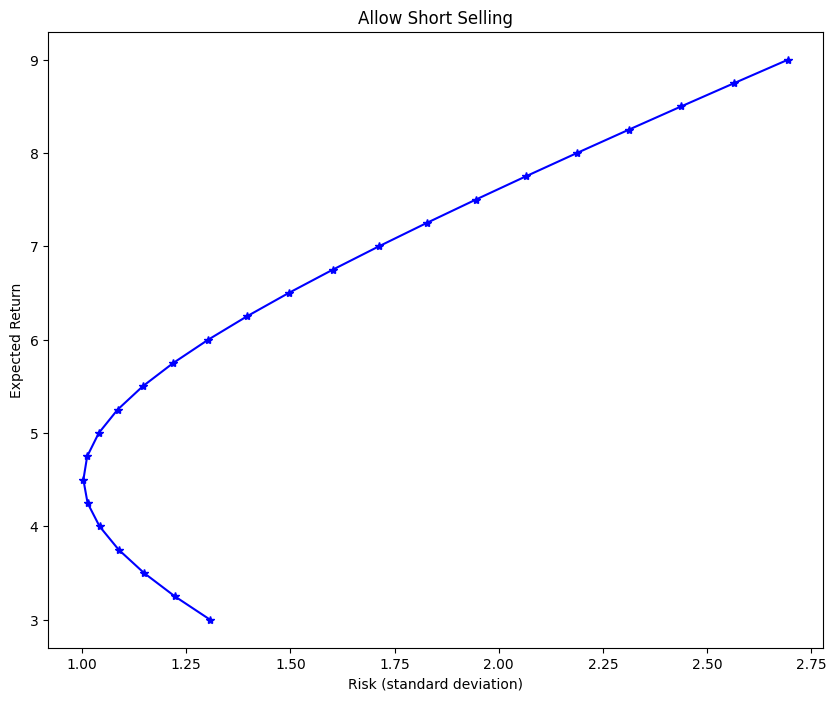

In [18]:
# Plot efficient frontier
fig, ax = plt.subplots(figsize=(10,8))
ax.set_title('Allow Short Selling')
ax.plot(frontier[0],frontier[1], color='b', linestyle='-',marker='*')
ax.set_ylabel('Expected Return')
ax.set_xlabel('Risk (standard deviation)')